<a href="https://colab.research.google.com/github/Maureenchepkirui/Titanic_Survival_Prediction-and-Spam_Prediction/blob/main/MAUREEN_CHEPKIRUI_SPAM_BASE_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Defining the Question

### a) Specifying the Data Analytic Question

Predict whether an e-mail is spam (1) or not (0)

### b) Defining the Metric for Success

To be able to create a model using the Naive Bayes Classifier that can predict whether an email is spam or not.The model should have an accuracy of over 80%.

### c) Understanding the context 

The "spam" concept is diverse: advertisements for products/web sites, make money fast schemes, chain letters, pornography...

Our collection of spam e-mails came from our postmaster and individuals who had filed spam. Our collection of non-spam e-mails came from filed work and personal e-mails, and hence the word 'george' and the area code '650' are indicators of non-spam. These are useful when constructing a personalized spam filter. One would either have to blind such non-spam indicators or get a very wide collection of non-spam to generate a general purpose spam filter.
The last column of 'spambase.data' denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. Most of the attributes indicate whether a particular word or character was frequently occuring in the e-mail. The run-length attributes (55-57) measure the length of sequences of consecutive capital letters. For the statistical measures of each attribute, see the end of this file. Here are the definitions of the attributes:

48 continuous real [0,100] attributes of type word_freq_WORD
= percentage of words in the e-mail that match WORD, i.e. 100 * (number of times the WORD appears in the e-mail) / total number of words in e-mail. A "word" in this case is any string of alphanumeric characters bounded by non-alphanumeric characters or end-of-string.

6 continuous real [0,100] attributes of type char_freq_CHAR]
= percentage of characters in the e-mail that match CHAR, i.e. 100 * (number of CHAR occurences) / total characters in e-mail

1 continuous real [1,...] attribute of type capital_run_length_average
= average length of uninterrupted sequences of capital letters

1 continuous integer [1,...] attribute of type capital_run_length_longest
= length of longest uninterrupted sequence of capital letters

1 continuous integer [1,...] attribute of type capital_run_length_total
= sum of length of uninterrupted sequences of capital letters
= total number of capital letters in the e-mail

1 nominal {0,1} class attribute of type spam
= denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail.



### d) Recording the Experimental Design

* Download the dataset from the given link:

* Dataset 2 Source: https://archive.ics.uci.edu/ml/datasets/Spambase

* Because we don't have the label for the test set, we will use the train set to create train and test data (i.e. splitting further), then perform K-nearest neighbor classification.

* perform classification of the testing set samples using the Naive Bayes Classifier.

* Compute the accuracy (percentage of correct classification).

* Report the confusion matrix of each classifier.

* Repeat step 2 to step 4 twice, each time splitting the datasets differently i.e. 70-30, 60-40, then note the outcomes of your modeling.

* Suggest and apply at least one of the optimization techniques that you learned earlier this week.

* Provide further recommendations to improve both classifiers.

### e) Data Relevance

The data is very relevant,hence very useful to achieve our projects

## 2. Reading the Data

In [5]:
# Load libraries and datasets to be used in this example
#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [6]:
# Loading the Data from the source
# Loading the names files first so that we can use the column names in our dataset
with open("/content/spambase.names") as f:
  print(f.read())

# Loading the spambase dataset
# ---
df=pd.read_csv("/content/spambase.data",header=None)
df.columns = ['word_freq_make','word_freq_address','word_freq_all','word_freq_3d','word_freq_our','word_freq_over','word_freq_remove','word_freq_internet','word_freq_order','word_freq_mail','word_freq_receive','word_freq_will','word_freq_people','word_freq_report','word_freq_addresses','word_freq_free','word_freq_business','word_freq_email','word_freq_you','word_freq_credit','word_freq_your','word_freq_font','word_freq_000','word_freq_money','word_freq_hp','word_freq_hpl','word_freq_george','word_freq_650','word_freq_lab','word_freq_labs','word_freq_telnet','word_freq_857','word_freq_data','word_freq_415','word_freq_85','word_freq_technology','word_freq_1999','word_freq_parts','word_freq_pm','word_freq_direct','word_freq_cs','word_freq_meeting','word_freq_original','word_freq_project','word_freq_re','word_freq_edu','word_freq_table','word_freq_conference','char_freq_;','char_freq_(','char_freq_[','char_freq_!','char_freq_$','char_freq_#','capital_run_length_average','capital_run_length_longest','capital_run_length_total','class']

df.head(4)

| SPAM E-MAIL DATABASE ATTRIBUTES (in .names format)
|
| 48 continuous real [0,100] attributes of type word_freq_WORD 
| = percentage of words in the e-mail that match WORD,
| i.e. 100 * (number of times the WORD appears in the e-mail) / 
| total number of words in e-mail.  A "word" in this case is any 
| string of alphanumeric characters bounded by non-alphanumeric 
| characters or end-of-string.
|
| 6 continuous real [0,100] attributes of type char_freq_CHAR
| = percentage of characters in the e-mail that match CHAR,
| i.e. 100 * (number of CHAR occurences) / total characters in e-mail
|
| 1 continuous real [1,...] attribute of type capital_run_length_average
| = average length of uninterrupted sequences of capital letters
|
| 1 continuous integer [1,...] attribute of type capital_run_length_longest
| = length of longest uninterrupted sequence of capital letters
|
| 1 continuous integer [1,...] attribute of type capital_run_length_total
| = sum of length of uninterrupted sequences of

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1




## 3. Checking the Data

In [7]:
# Determining the no. of records in our dataset
#
df.shape

(4601, 58)

The dataset has 4601 records and 58 variables.

In [8]:
# Previewing the top of our dataset
#
df.head(5)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [9]:
# Previewing the bottom of our dataset
# 
df.tail(5)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
4596,0.31,0.0,0.62,0.0,0.00,0.31,0.0,0.0,0.0,0.0,0.0,1.88,0.00,0.0,0.0,0.0,0.0,0.0,0.62,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.31,0.31,0.31,0.0,0.0,0.000,0.232,0.0,0.000,0.0,0.0,1.142,3,88,0
4597,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,6.00,0.0,2.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,2.00,0.0,0.0,0.000,0.000,0.0,0.353,0.0,0.0,1.555,4,14,0
4598,0.30,0.0,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1.80,0.30,0.0,0.0,0.0,0.0,0.9,1.50,0.0,0.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,1.20,0.0,0.0,0.102,0.718,0.0,0.000,0.0,0.0,1.404,6,118,0
4599,0.96,0.0,0.00,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,1.93,0.0,0.32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.32,0.0,0.0,0.000,0.057,0.0,0.000,0.0,0.0,1.147,5,78,0
4600,0.00,0.0,0.65,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.65,0.0,0.0,0.0,0.0,0.0,4.60,0.0,0.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.97,0.65,0.0,0.0,0.000,0.000,0.0,0.125,0.0,0.0,1.250,5,40,0


In [10]:
# Checking the number of unique classes in each column
# This helps in knowing whether a column is categorical, numerical or is an object
df.nunique()

word_freq_make                 142
word_freq_address              171
word_freq_all                  214
word_freq_3d                    43
word_freq_our                  255
word_freq_over                 141
word_freq_remove               173
word_freq_internet             170
word_freq_order                144
word_freq_mail                 245
word_freq_receive              113
word_freq_will                 316
word_freq_people               158
word_freq_report               133
word_freq_addresses            118
word_freq_free                 253
word_freq_business             197
word_freq_email                229
word_freq_you                  575
word_freq_credit               148
word_freq_your                 401
word_freq_font                  99
word_freq_000                  164
word_freq_money                143
word_freq_hp                   395
word_freq_hpl                  281
word_freq_george               240
word_freq_650                  200
word_freq_lab       

In [11]:
# Checking whether each column has an appropriate datatype
#
df.dtypes

word_freq_make                float64
word_freq_address             float64
word_freq_all                 float64
word_freq_3d                  float64
word_freq_our                 float64
word_freq_over                float64
word_freq_remove              float64
word_freq_internet            float64
word_freq_order               float64
word_freq_mail                float64
word_freq_receive             float64
word_freq_will                float64
word_freq_people              float64
word_freq_report              float64
word_freq_addresses           float64
word_freq_free                float64
word_freq_business            float64
word_freq_email               float64
word_freq_you                 float64
word_freq_credit              float64
word_freq_your                float64
word_freq_font                float64
word_freq_000                 float64
word_freq_money               float64
word_freq_hp                  float64
word_freq_hpl                 float64
word_freq_ge

In [12]:
# We can check for the unique values in the 'class' column
print(df['class'].unique())

[1 0]


## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.


### a.Validation

## 5. Tidying the Dataset

In [13]:
# Checking for Outliers
#
# Checking for outliers using the Inter Quantile Range(IQR)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Removing outliers based on the IQR range 
new_df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Printing the shape of our new dataset
print(new_df.shape)

# Printing the shape of our old dataset
print(df.shape)


(177, 58)
(4601, 58)


There are outliers but we shall not remove them since  we need our dataset to retain it's meaning.

In [14]:
# Checking for Anomalies
#

In [15]:
# Identifying the Missing Data
#
df.isnull().sum().sum()

0

In [16]:
# More data cleaning procedures
#
df.duplicated().sum()

391

In [17]:
#we shall drop duplicates
df.drop_duplicates()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.00,0.06,0.06,0.0,0.0,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,0.00,1.88,0.00,0.00,0.00,0.00,0.00,0.00,0.62,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.31,0.31,0.31,0.0,0.0,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.00,0.00,2.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,2.00,0.0,0.0,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.80,0.30,0.00,0.00,0.00,0.00,0.90,1.50,0.00,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,1.20,0.0,0.0,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.32,0.00,0.00,0.00,0.00,0.00,0.00,1.93,0.00,0.32,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.32,0.00,0.32,0.0,0.0,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


## 6. Exploratory Analysis

In [18]:
#Frequency table for the target column
# We can check for the frequency distribution in our dataset
df['class'].value_counts()

0    2788
1    1813
Name: class, dtype: int64

From the above, 2788 are spam messages and 1813 are not spam

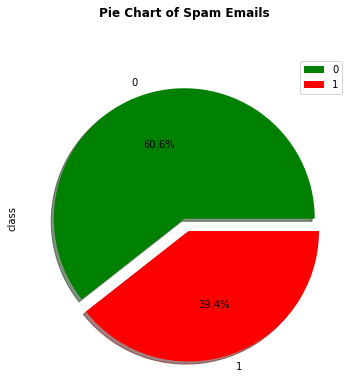

In [19]:
# Pie chart Pie Chart of Spam Emails
df['class'].value_counts().plot(kind='pie',shadow = True,explode=(0,0.1), colors=["green","red"], autopct='%1.1f%%')
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.legend(loc='upper right')
plt.title('Pie Chart of Spam Emails', y=1.1,weight="bold")
plt.show()

In [20]:
#Data description
df.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,0.059824,0.541702,0.093930,0.058626,0.049205,0.248848,0.142586,0.184745,1.662100,0.085577,0.809761,0.121202,0.101645,0.094269,0.549504,0.265384,0.767305,0.124845,0.098915,0.102852,0.064753,0.047048,0.097229,0.047835,0.105412,0.097477,0.136953,0.013201,0.078629,0.064834,0.043667,0.132339,0.046099,0.079196,0.301224,0.179824,0.005444,0.031869,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,0.201545,0.861698,0.301036,0.335184,0.258843,0.825792,0.444055,0.531122,1.775481,0.509767,1.200810,1.025756,0.350286,0.442636,1.671349,0.886955,3.367292,0.538576,0.593327,0.456682,0.403393,0.328559,0.555907,0.329445,0.532260,0.402623,0.423451,0.220651,0.434672,0.349916,0.361205,0.766819,0.223812,0.621976,1.011687,0.911119,0.076274,0.285735,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.310000,0.000000,0.220000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

In [21]:
# Checking for independence between features¶
# Correlation
df.corr()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
word_freq_make,1.000000,-0.016759,0.065627,0.013273,0.023119,0.059674,0.007669,-0.003950,0.106263,0.041198,0.188459,0.105801,0.066438,0.036780,0.028439,0.059386,0.081928,0.053324,0.128243,0.021295,0.197049,-0.024349,0.134072,0.188155,-0.072504,-0.061686,-0.066424,-0.048680,-0.041251,-0.052799,-0.039066,-0.032058,-0.041014,-0.027690,-0.044954,-0.054673,-0.057312,-0.007960,-0.011134,-0.036095,-0.009703,-0.026070,-0.024292,-0.022116,-0.037105,-0.034056,-0.000953,-0.017755,-0.026505,-0.021196,-0.033301,0.058292,0.117419,-0.008844,0.044491,0.061382,0.089165,0.126208
word_freq_address,-0.016759,1.000000,-0.033526,-0.006923,-0.023760,-0.024840,0.003918,-0.016280,-0.003826,0.032962,-0.006864,-0.040398,-0.018858,-0.009206,0.005330,-0.009117,-0.018370,0.033500,-0.055476,-0.015806,-0.018191,-0.008850,-0.020502,0.001984,-0.043483,-0.038211,-0.030307,-0.029221,-0.021940,-0.027508,-0.018097,-0.003326,-0.024903,-0.004303,-0.024058,-0.028198,-0.024013,-0.008922,-0.019124,-0.014821,-0.015420,-0.025177,-0.002370,-0.019739,-0.016418,-0.023858,-0.009818,-0.015747,-0.007282,-0.049837,-0.018527,-0.014461,-0.009605,0.001946,0.002083,0.000271,-0.022680,-0.030224
word_freq_all,0.065627,-0.033526,1.000000,-0.020246,0.077734,0.087564,0.036677,0.012003,0.093786,0.032075,0.048254,0.083210,0.047593,0.008552,0.122113,0.063906,0.036262,0.121923,0.139329,0.031111,0.156651,-0.035681,0.123671,0.041145,-0.087924,-0.062459,-0.108886,-0.050648,-0.057726,-0.032547,-0.038927,-0.061870,-0.054759,-0.061706,-0.048335,-0.046504,-0.067015,0.032407,-0.014809,-0.047066,-0.030956,-0.005811,-0.044325,-0.053464,-0.050664,-0.056655,0.029339,-0.026344,-0.033213,-0.016495,-0.033120,0.108140,0.087618,-0.003336,0.097398,0.107463,0.070114,0.196988
word_freq_3d,0.013273,-0.006923,-0.020246,1.000000,0.003238,-0.010014,0.019784,0.010268,-0.002454,-0.004947,-0.012976,-0.019221,-0.013199,0.012008,0.002707,0.007432,0.003470,0.019391,-0.010834,-0.005381,0.008176,0.028102,0.011368,0.035360,-0.015181,-0.013708,-0.010684,-0.010368,-0.007798,-0.010476,-0.007529,-0.006717,-0.008075,-0.006729,-0.006122,-0.006515,-0.007761,-0.002669,-0.004602,-0.007643,-0.005670,-0.008095,-0.009268,-0.005933,-0.012957,-0.009181,-0.003348,-0.001924,-0.000591,-0.012370,-0.007148,-0.003138,0.010862,-0.000298,0.005260,0.022081,0.021369,0.057371
word_freq_our,0.023119,-0.023760,0.077734,0.003238,1.000000,0.054054,0.147336,0.029598,0.020823,0.034495,0.068382,0.066788,0.031126,0.003445,0.056177,0.083024,0.143443,0.062344,0.098510,0.031526,0.136605,-0.020207,0.070037,0.000039,-0.072502,-0.075456,-0.088011,-0.061501,0.032048,-0.052066,-0.042535,-0.026748,-0.031998,-0.026960,-0.049732,-0.048844,-0.072599,0.130812,-0.042044,-0.021442,-0.047505,0.115041,-0.048879,0.015234,-0.042336,-0.077986,-0.026900,-0.032005,-0.032759,-0.046361,-0.026390,0.025509,0.041582,0.002016,0.052662,0.052290,0.002492,0.241920
word_freq_over,0.059674,-0.024840,0.087564,-0.010014,0.054054,1.000000,0.061163,0.079561,0.117438,0.013897,0.053900,0.009264,0.077631,0.009673,0.173066,0.019865,0.064137,0.078350,0.095505,0.058979,0.106833,0.007956,0.211455,0.0

## 7. Implementing the Solution

### a)80-20 Train Test split

In [22]:
#splitting data into target and features
X=df.drop(["class"],1)
y=df[["class"]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
# Feature scaling 
# Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Perform feature scaling using standardization then fit our mode using train set

We shall use Multinomial Naive Bayes Classifier for training and prediction. The program guesses the tag of a text, such as an email or a newspaper story, using the Bayes theorem. It calculates each tag's likelihood for a given sample and outputs the tag with the greatest chance.

In [24]:
# Import the Naive Bayes library and from it get the MultinomialNB class
from sklearn.naive_bayes import MultinomialNB

# Introduce the Multinomial object and fit the train set 
model = MultinomialNB()
model.fit(X_train, y_train)
#making predictions
y_pred= model.predict(X_test)
# model score
#from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
print("Accuracy ",accuracy_score(y_test,y_pred)*100)

Accuracy  70.90119435396308


The accuracy of our model is 70.9% we shall try other train test split and see if there is a difference in the accuracy.

### b) 70-30 Train and Test Set Split

In [25]:
#splitting data into target and features
X=df.drop(["class"],1)
y=df[["class"]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [26]:
# Feature scaling 
# Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Perform feature scaling using standardization then fit our mode using train set

We shall use Multinomial Naive Bayes Classifier for training and prediction. because it is most suited for text beingclassification purposes.

In [27]:
# Import the Naive Bayes library and from it get the MultinomialNB class
from sklearn.naive_bayes import MultinomialNB

# Introduce the Multinomial object and fit the train set 
model = MultinomialNB()
model.fit(X_train, y_train)
#making predictions
y_pred= model.predict(X_test)
# model score
#from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
print("Accuracy ",accuracy_score(y_test,y_pred)*100)

Accuracy  71.10789283128169


The accuracy of our model increases by 1% as after using 80-20 train test split

### c)60-40 train and test split

In [28]:
#splitting data into target and features
X=df.drop(["class"],1)
y=df[["class"]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


In [29]:
# Feature scaling 
# Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Perform feature scaling using standardization then fit our mode using train set

We shall use Multinomial Naive Bayes Classifier for training and prediction. because it is most suited for text beingclassification purposes.

In [30]:
# Import the Naive Bayes library and from it get the MultinomialNB class
from sklearn.naive_bayes import MultinomialNB

# Introduce the Multinomial object and fit the train set 
model = MultinomialNB()
model.fit(X_train, y_train)
#making predictions
y_pred= model.predict(X_test)
# model score
#from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
print("Accuracy ",accuracy_score(y_test,y_pred)*100)

Accuracy  70.72243346007605


The accuracy drops to 70% again.

The train test set with a higher accuracy is 70-30 test train split.

We shall try and optimize this mode to see if the performance of the model will be better.

## 8. Challenging the solution

> The easy solution is nice because it is, well, easy, but you should never allow those results to hold the day. You should always be thinking of ways to challenge the results, especially if those results comport with your prior expectation.






## Multinomial Naive Bayes Classifier 2

In [31]:
#Checking multicollinearity
# Pick independent variables only.
independent=df.drop(columns=["class"])

# Let's display the correlations between the variables
correlations=independent.corr()
# Checking for multicollinearity using the VIF 
vif= pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)
vif

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
word_freq_make,1.135153,0.012350,-0.003005,-0.011262,0.019017,-0.010584,0.056967,0.067177,-0.049812,0.011000,-0.147383,-0.080526,-0.019708,-0.004347,0.050059,-0.020360,-0.032932,-0.014943,-0.024204,0.039415,-0.113488,0.020591,-0.104968,-0.159214,0.016099,0.002550,0.024919,-0.000843,0.026043,0.014323,-0.001674,0.497421,0.015831,-0.580696,0.004708,0.023563,0.030963,0.000069,-0.017190,0.052675,-0.019840,-0.004041,-0.013928,0.004175,0.009231,0.011212,-0.000122,0.004829,0.006815,-0.012300,0.019723,-0.018004,-0.034538,0.004134,-0.035584,0.017688,-0.031946
word_freq_address,0.012350,1.034308,0.035450,0.014838,0.027797,0.027689,0.007607,0.024007,0.009444,-0.043468,-0.002407,0.040869,0.026032,0.006125,0.002169,0.018901,0.009151,-0.047766,0.091338,0.017722,0.019839,0.025579,0.017815,-0.010903,0.054712,0.026177,0.076168,0.012972,0.006283,0.019139,0.006651,-0.260265,0.036246,0.127292,0.013906,0.050449,0.018780,0.005460,0.006231,0.025134,0.008746,0.027087,-0.006193,0.031777,0.018018,0.040783,0.012268,0.022013,0.003940,0.085882,0.022466,0.013535,-0.002269,-0.005881,0.020770,-0.062032,0.042594
word_freq_all,-0.003005,0.035450,1.110868,0.025553,-0.025045,-0.029081,0.018319,0.026838,-0.030984,0.020052,0.029335,-0.055152,-0.006404,0.009230,-0.066318,-0.033517,0.024790,-0.068281,-0.073042,-0.000892,-0.093658,0.037268,-0.057363,0.018393,0.049853,0.001784,0.076732,0.008023,0.052268,-0.057110,-0.032204,-0.095813,0.037710,0.121415,0.017017,-0.023692,0.023023,-0.033580,-0.014925,0.040945,0.000292,-0.028603,0.013328,0.046181,0.042644,0.041779,-0.031549,0.016652,0.010199,-0.010206,0.014296,-0.072305,-0.006081,0.007517,-0.089127,-0.012638,-0.012719
word_freq_3d,-0.011262,0.014838,0.025553,1.007701,-0.000716,0.018018,-0.017022,-0.009305,0.012870,0.005555,0.022808,0.019571,0.021511,-0.010165,0.005498,0.001048,0.000294,-0.019564,0.023535,0.011474,-0.005378,-0.029183,-0.009220,-0.034434,0.011956,0.005976,0.018704,0.002409,-0.002053,0.001831,0.002571,-0.033283,0.009278,0.013410,0.000067,0.001455,0.000180,0.001763,-0.004319,0.008475,0.001438,0.006994,0.004688,0.007117,0.010968,0.009974,0.003676,0.002012,0.014291,0.028890,0.006529,0.005109,-0.004871,0.008424,0.013313,-0.038843,-0.006344
word_freq_our,0.019017,0.027797,-0.025045,-0.000716,1.120328,-0.019608,-0.104157,0.016928,0.036461,-0.008505,0.006160,-0.030493,-0.009181,-0.000783,-0.032217,-0.051898,-0.112734,-0.026989,-0.045829,0.010691,-0.074217,0.017576,-0.024232,0.042079,0.017067,0.039075,0.069237,0.016347,-0.014479,0.015306,0.023613,-0.152296,0.016175,0.052744,0.016418,0.013761,0.019610,-0.130431,0.017076,0.026061,0.006765,-0.120144,0.018476,-0.030431,0.027496,0.059977,0.029395,0.023478,0.009986,0.030219,0.005502,0.017516,0.007048,0.002538,-0.039619,-0.033918,0.028846
word_freq_over,-0.010584,0.027689,-0.029081,0.018018,-0.019608,1.099838,-0.021059,-0.044818,-0.054087,0.045362,0.015087,0.011433,-0.032913,0.010359,-0.093922,0.020304,-0.000187,-0.014927,-0.029474,-0.028741,-0.026019,-0.005784,-0.146258,-0.017472,0.026618,0.035386,0.042820,0.021292,0.003759,-0.016409,0.009055,-0.111890,0.014203,0.040811,0.016191,0

The VIF score for each variable is found alongside the downwards sloping diagonal. We shall not drop any column since the VIF scores are small.

In [32]:
# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop features 
df.drop(df[drop], axis=1)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.00,0.06,0.06,0.0,0.0,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,0.00,1.88,0.00,0.00,0.00,0.00,0.00,0.00,0.62,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.31,0.31,0.31,0.0,0.0,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.00,0.00,2.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,2.00,0.0,0.0,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.80,0.30,0.00,0.00,0.00,0.00,0.90,1.50,0.00,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,1.20,0.0,0.0,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.32,0.00,0.00,0.00,0.00,0.00,0.00,1.93,0.00,0.32,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.32,0.00,0.32,0.0,0.0,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [33]:
#splitting data into target and features
X=df.drop(["class"],1)
y=df[["class"]]

# Split the data in the 80/20 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
# Normalizing our data

# Transform feature matrix
from sklearn.preprocessing import Normalizer

scaler= Normalizer(norm="l1")
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
#hypeparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import Normalizer
parameters = {   
    'alpha': (1, 0.1, 0.01, 0.001, 0.0001, 0.00001)  
    }   
model = MultinomialNB()
#fitting the model with the best parameters
model = GridSearchCV(model, parameters, cv=5)
model.fit(X_train,y_train)
model.best_params_

{'alpha': 0.001}

In [36]:
from sklearn.naive_bayes import MultinomialNB
# Introduce the MultinumialNB object and fit the train set 
model = MultinomialNB(alpha=0.001, fit_prior=False, class_prior=None)
model.fit(X_train, y_train)

# Making predictions using our MultinomialNB classifier
y_pred1 = model.predict(X_test)

In [37]:
# Import the metrics libraries
from sklearn.metrics import accuracy_score
print("Accuracy ",accuracy_score(y_test,y_pred1)*100)

Accuracy  74.0499457111835


After perforning feature selection, normalizing and optimizing our data, the accuracy of the MultinomialNB classifier increased to 73% which is an improvemnt from our previous score which was 71%


## Gaussian Naive Bayes Classifier

Gaussian Naive Bayes Classifier asumes that the distribution of features is gaussian. We shall test this using the shapiro test.

In [38]:
# Using the Shapiro-Wiks function to test for normality

# Imporing the shapiro function
from scipy.stats import shapiro 

# Testing for normality
stat, p = shapiro(df)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# Interpreting the p-value while comparing with the alpha
# to determine if the data is Gaussian
alpha = 0.05
if p > alpha:
	print('Data looks Gaussian')
else:
	print('Data does not look Gaussian')

Statistics=0.037, p=0.000
Data does not look Gaussian


Our features are not normally distributed but we shall assess the performance of our Gaussian Naive Bayes classifier on our dataset just for comparison purposes.

In [39]:
#splitting data into target and features
X=df.drop(["class"],1)
y=df[["class"]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Feature scaling 
# Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [40]:
from sklearn.naive_bayes import GaussianNB

# Introduce the Gaussian object and fit the train set 
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [41]:
# Making predictions using our MultinomialNB classifier
y_pred = model.predict(X_test)

# Import the metrics libraries
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[520  18]
 [187 196]]
              precision    recall  f1-score   support

           0       0.74      0.97      0.84       538
           1       0.92      0.51      0.66       383

    accuracy                           0.78       921
   macro avg       0.83      0.74      0.75       921
weighted avg       0.81      0.78      0.76       921



Gaussian gave us a higher accuracy but it works best with data that follows a normal distribution

## Conclusion

From the analysis, I came up with the following conclusions that help in attaining the highest accuracy of the model.

* Normalizing the data using l2 normalizer since it achieves a higher accuracy compared to the l1 normalizer.

* Using the 80 - 20 train and test split.

* Using a MultinomialNB classifier.

##  Follow up questions

### a). Did we have the right data?

The data we had was relevant to our prediction.

### b). Do we need other data to answer our question?

No. The data we had was adequate.